In [46]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

In [ ]:
# Constantes
GRAVEDAD = 9.81  # m/s^2
DENSIDAD_DEL_AIRE = 1.225  # kg/m^3
AREA_SECCION_TRANSVERSAL = 0.01  # m^2
COEFICIENTE_ARRASTRE = 0.5

def trayectoria_proyectil(x0, y0, z0, v0, resistencia_viento, angulo_x, angulo_y):
    angulo_x_rad = math.radians(angulo_x)
    angulo_y_rad = math.radians(angulo_y)
    vx = v0 * math.cos(angulo_x_rad) * math.cos(angulo_y_rad)
    vy = v0 * math.sin(angulo_x_rad) * math.cos(angulo_y_rad)
    vz = v0 * math.sin(angulo_y_rad)
    
    trayectoria = []
    dt = 0.01  # Intervalo de tiempo
    t = 0
    while z0 >= 0:
        x = x0 + vx * t
        y = y0 + vy * t
        z = z0 + vz * t - 0.5 * GRAVEDAD * t**2
        if z < 0: break  # Termina el bucle si el proyectil toca el suelo
        
        resistencia_aire = 0.5 * DENSIDAD_DEL_AIRE * (vx**2 + vy**2) * AREA_SECCION_TRANSVERSAL * COEFICIENTE_ARRASTRE
        vx -= (resistencia_aire + resistencia_viento) * dt / v0
        vy -= resistencia_aire * dt / v0
        vz -= GRAVEDAD * dt
        
        trayectoria.append((x, y, z))
        t += dt
    
    return trayectoria

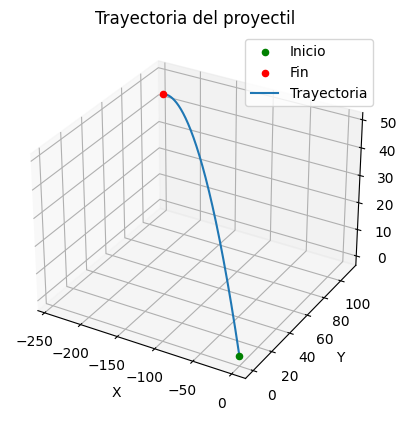

In [39]:
# Inicialización de variables y cálculo de la trayectoria
x0, y0, z0, v0 = 0, 0, 0, 100
resistencia_viento = 10
angulo_x, angulo_y = random.randint(0, 180), random.randint(0, 90)

trayectoria = trayectoria_proyectil(x0, y0, z0, v0, resistencia_viento, angulo_x, angulo_y)

# Gráfica
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = zip(*trayectoria)
ax.plot(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Trayectoria del proyectil')
plt.show()